# Applied ML Assignment 1
# Heart Attack Analaysis
## Introduction
 A heart attack occurs when an artery supplying your heart with blood and oxygen becomes blocked. A blood clot can form and block your arteries, causing a heart attack. This Heart Attack Analysis helps to understand the chance of attack occurrence in persons based on varied health conditions.

## Dataset
The dataset is `Heart_Attack_Analysis_Data.csv`. It has been uploaded to elearn. 
This dataset contains data about some hundreds of patients mentioning: 
- Age 
- Sex
- Exercise Include Angina(1=YES, 0=NO) 
- CP_Type (Chest Pain) (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) 
- ECG Results
- Blood Pressure 
- Cholesterol 
- Blood Sugar 
- Family History (Number of persons affected in the family) 
- Maximum Heart Rate 
- Target (0 = LESS CHANCE , 1 = MORE CHANCE)

## Aim
- Building a Predictive Model using Naïve Bayesian Approach (Which features decide heart attack?)
- Comment on the performance of this model using AUC-ROC, Precision, Recall, F_score, Accuracy

You need to 
1. Preprocess the data to enhance quality
2. Carry out descriptive summarization of data and make observations
3. Identify relevant, irrelevant attributes for building model. 
4. Use data visualization tools and make observations
5. Carry out the chosen analytic task. Show results including intermediate results, as needed
6. Evaluate the solution

Following are some points for you to take note of, while doing the assignment in Jupyter Notebook:
- State all your assumptions clearly
- List all intermediate steps and learnings
- Mention your observations/findings

---

## Objectives

This notebook compares accuracy and other metrics of two models fit for the given data:
1. **MODEL 1:** Model fit with data after cleaning, preprocessing done to only numerical features
2. **MODEL 2:** Model fit with cleaning, preprocessing done to both numerical and categorical features

## Importing necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import warnings

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

## Data Cleaning, Preprocessing
Check the shape of the dataframe loaded into memory from the CSV file and see the datatypes used in the dataset given

In [2]:
df = pd.read_csv("./Heart_Attack_Analysis_Data.csv")
print("Dataframe Shape: {}".format(df.shape))
print("----------------------------------\n")
print("With following data types:\n")
df.info()
print("----------------------------------\n")
print("First 5 rows of Dataframe:")
df.head()

Dataframe Shape: (303, 11)
----------------------------------

With following data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             303 non-null    int64
 1   Sex             303 non-null    int64
 2   CP_Type         303 non-null    int64
 3   BloodPressure   303 non-null    int64
 4   Cholestrol      303 non-null    int64
 5   BloodSugar      303 non-null    int64
 6   ECG             303 non-null    int64
 7   MaxHeartRate    303 non-null    int64
 8   ExerciseAngina  303 non-null    int64
 9   FamilyHistory   303 non-null    int64
 10  Target          303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB
----------------------------------

First 5 rows of Dataframe:


,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


All columns seems to be of type `integer` and all columns have a value for all rows (303 not null), which means that all values are filled and there are no missing values.

#### Now to check certain columns with humanly possible ranges based on domain knowledge:
1. 0 < Age <= 100 years
2. 90 <= BloodPressure <= 200
3. 60 <= MaxHeartRate <= 220

In [3]:
print("\nMinimum Age = {}".format(df["Age"].min()))
print("Maximum Age = {}".format(df["Age"].max()))

print("\nMinimum Blood Pressure = {}".format(df["BloodPressure"].min()))
print("Maximum Blood Pressure = {}".format(df["BloodPressure"].max()))

print("\nMinimum Heart Rate = {}".format(df["MaxHeartRate"].min()))
print("Maximum Heart Rate = {}".format(df["MaxHeartRate"].max()))


Minimum Age = 29
Maximum Age = 77

Minimum Blood Pressure = 94
Maximum Blood Pressure = 200

Minimum Heart Rate = 71
Maximum Heart Rate = 202


**All** of the mentioned columns have values within acceptable ranges.

#### Checking number of unique values for each column
`Column Name -> Unique Number count`

In [4]:
for column in list(df.columns):
    print("{} -> {}".format(column, df[column].value_counts().shape[0]))

Age -> 41
Sex -> 2
CP_Type -> 4
BloodPressure -> 49
Cholestrol -> 152
BloodSugar -> 2
ECG -> 3
MaxHeartRate -> 91
ExerciseAngina -> 2
FamilyHistory -> 6
Target -> 2


**Taking columns that have a maximum of 4 unique values (And based on column values mentioned in assignment document) as categorical and the rest as numeric:**

In [5]:
category_list = ["Sex", "CP_Type", "BloodSugar", "ECG", "ExerciseAngina"]
numeric_list = ["Age", "BloodPressure", "Cholestrol", "MaxHeartRate", "FamilyHistory"]

#### Checking frequncy of each categorical feature wrt target column to check how well it is balanced 

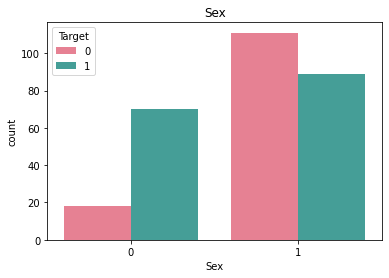

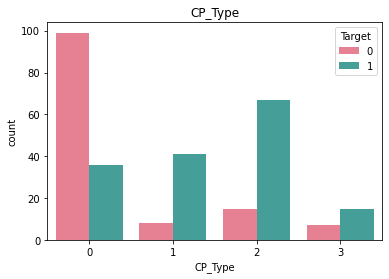

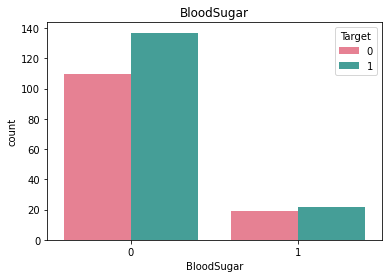

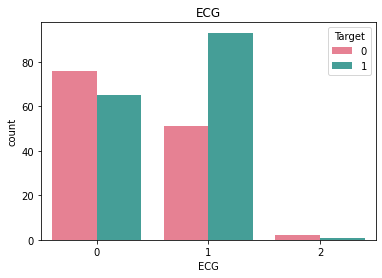

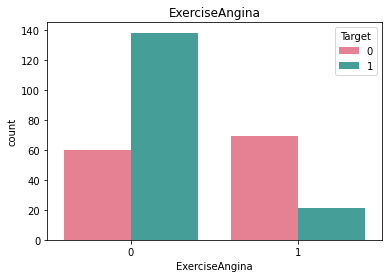

In [25]:
df_category = df.loc[:, category_list]
df_category["Target"] = df["Target"]
for i in category_list:
    plt.figure()
    sb.countplot(x = i, data = df_category, hue = "Target", palette="husl")
    plt.title(i)

#### Pair Plotting numeric features

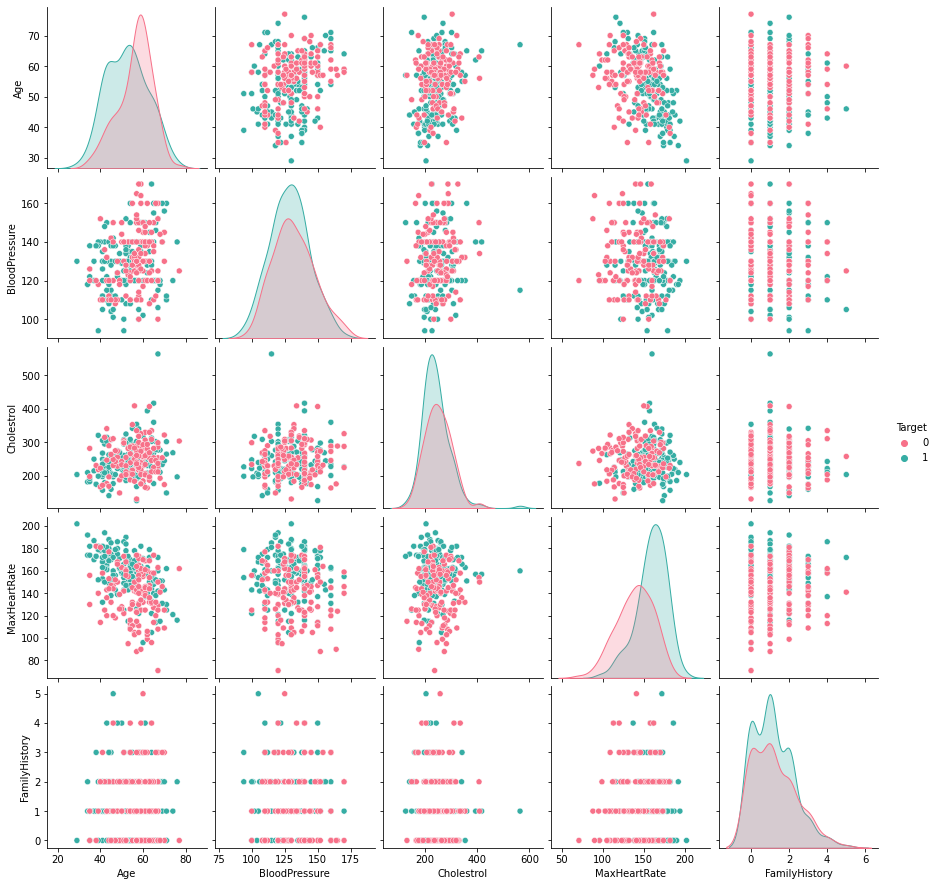

In [24]:
df_number = df.loc[:, numeric_list]
df_number["Target"] = df["Target"]
sb.pairplot(df_number, hue = "Target", palette="husl")
plt.show()

The pair plots do not show any particular trends that can be used to reduce numerical features. We do see a slight relation between age and max heart rate but the plot is scattered enough to not relate them.

#### Scaling the numeric attributes in the dataframe with a standard scaler

In [8]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_list])
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  0.72636505],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147, -0.1868657 ],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389, -1.10009645],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176, -1.10009645],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489, -1.10009645],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -1.10009645]])

#### Analyzing the boxplot for scaled numeric attributes to check for outliers

        Age  BloodPressure  Cholestrol  MaxHeartRate  FamilyHistory
0  0.952197       0.763956   -0.256334      0.015443       0.726365
1 -1.915313      -0.092738    0.072199      1.633471      -0.186866
2 -1.474158      -0.092738   -0.816773      0.977514      -1.100096
3  0.180175      -0.663867   -0.198357      1.239897      -0.186866
4  0.290464      -0.663867    2.082050      0.583939      -1.100096

----------------------------------



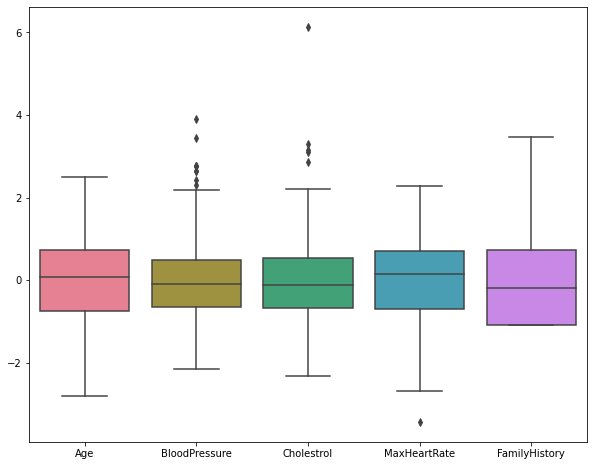

In [26]:
df_temp = pd.DataFrame(scaled_array, columns = numeric_list)
print(df_temp.head())
print("\n----------------------------------\n")
plt.figure(figsize=(10,8))
sb.boxplot(data=df_temp, palette="husl")
plt.show()

We can see some outlier values for blood pressure, cholestrol and max heart rate. we can drop these outliers using the IQR method.

#### Dropping outliers with IQR method 
Going with +/- $1.6$ * IQR to accomodate data upto $3\sigma$ from the mean to remove the outliers.

In [10]:
print("Original shape of dataframe: {}".format(df.shape))
for i in numeric_list:
    Q25 = np.percentile(df.loc[:, i],25)
    Q75 = np.percentile(df.loc[:, i],75)
    IQR = Q75 - Q25
    upper_bound = np.where(df.loc[:, i] >= (Q75 + 1.6*IQR))
    lower_bound = np.where(df.loc[:, i] <= (Q25 - 1.6*IQR))
    df.drop(upper_bound[0], inplace = True)
    df.drop(lower_bound[0], inplace = True)
print("Final shape of dataframe: {}".format(df.shape))

Original shape of dataframe: (303, 11)
Final shape of dataframe: (288, 11)


## Model 1
### Training a Guassian Naive Bayes model with the data (With scaling done to numerical features)

In [11]:
df1 = df.copy()
X = df1.drop(["Target"], axis = 1)
y = df1[["Target"]]
X[numeric_list] = scaler.fit_transform(X[numeric_list])

#### Split X and y to training and test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (244, 10)
y_train: (244, 1)
X_test: (44, 10)
y_test: (44, 1)


### Prediction Analysis:
The following is the analysis for a naive bayes model that was trained with the following done on the data:
1. Scale the numerical features with a standard scaler
2. Remove outliers 1.5 times IQR below and above the Q1 and Q3 respectively
3. Split the data into training and test data with a 15% test data

Model 1 Results:
----------------------------------

AUC-ROC Score: 83.7691%
Accuracy Score: 84.0909%
Precision Score: 88.4615%
Recall Score: 85.1852%
F1 Score: 86.7925%

----------------------------------

ROC Curve:


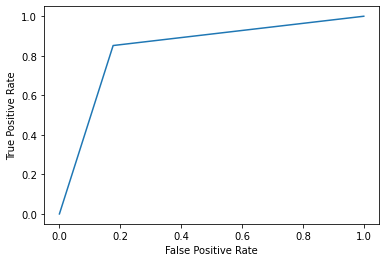


----------------------------------

Confusion matrix:


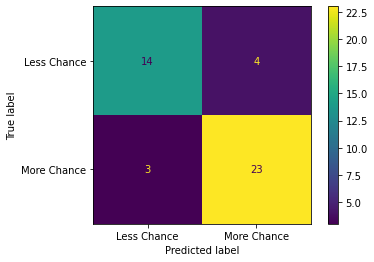

In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Model 1 Results:")
print("----------------------------------\n")
print("AUC-ROC Score: {0:0.4f}%".format(roc_auc_score(y_test, y_pred) * 100))
print("Accuracy Score: {0:0.4f}%".format(accuracy_score(y_test,y_pred) * 100))
print("Precision Score: {0:0.4f}%".format(precision_score(y_test,y_pred) * 100))
print("Recall Score: {0:0.4f}%".format(recall_score(y_test,y_pred) * 100))
print("F1 Score: {0:0.4f}%".format(f1_score(y_test,y_pred) * 100))

fpr, tpr, temp = roc_curve(y_test, y_pred)

print("\n----------------------------------\n")
print("ROC Curve:")
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("\n----------------------------------\n")
print("Confusion matrix:")
cm = confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm,display_labels =["Less Chance","More Chance"]).plot()
plt.show()

---
## Model 2
### Finding correlation between features through a heatmap

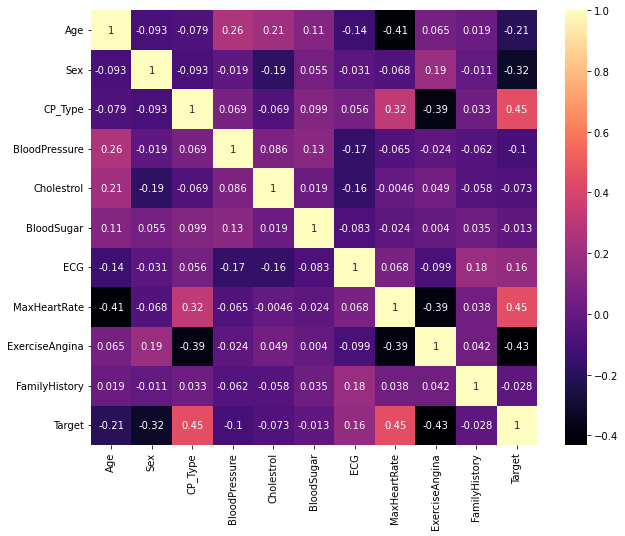


----------------------------------

The number of correlating features: 0
The correlating features are: set()

----------------------------------



In [31]:
corr_features = set()
corr_matrix = df.corr()
plt.figure(figsize = (10,8))
sb.heatmap(corr_matrix, annot = True, cmap="magma")
plt.show()

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
print("\n----------------------------------\n")
print("The number of correlating features: {}".format(len(corr_features)))
print("The correlating features are: {}".format(corr_features))
print("\n----------------------------------\n")

None of the features seem to correlate with each other and hence we cannot do feature reduction

### Training a Guassian Naive Bayes model with the data (With scaling done to numerical features and one hot encoding categorical features)

#### Original dataframe:

In [15]:
df2 = df.copy()
df2.head()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


#### One hot encoded dataframe:

In [16]:
df2 = pd.get_dummies(df2, columns = category_list, drop_first = True)
df2.head()

,Age,BloodPressure,Cholestrol,MaxHeartRate,FamilyHistory,Target,Sex_1,CP_Type_1,CP_Type_2,CP_Type_3,BloodSugar_1,ECG_1,ECG_2,ExerciseAngina_1
0,63,145,233,150,2,1,1,0,0,1,1,0,0,0
1,37,130,250,187,1,1,1,0,1,0,0,1,0,0
2,41,130,204,172,0,1,0,1,0,0,0,0,0,0
3,56,120,236,178,1,1,1,1,0,0,0,1,0,0
4,57,120,354,163,0,1,0,0,0,0,0,1,0,1


In [17]:
X = df2.drop(["Target"], axis = 1)
y = df2[["Target"]]
X[numeric_list] = scaler.fit_transform(X[numeric_list])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (244, 13)
y_train: (244, 1)
X_test: (44, 13)
y_test: (44, 1)


### Prediction Analysis:
The following is the analysis for a naive bayes model that was trained with the following done on the data:
1. One hot encode categorical features
2. Scale the numerical features with a standard scaler
3. Remove outliers 1.5 times IQR below and above the Q1 and Q3 respectively
4. Split the data into training and test data with 15% test data

Model 2 Results:
----------------------------------

AUC-ROC Score: 85.6209%
Accuracy Score: 86.3636%
Precision Score: 88.8889%
Recall Score: 88.8889%
F1 Score: 88.8889%

----------------------------------

ROC Curve:


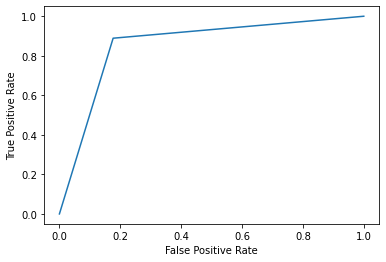


----------------------------------

Confusion matrix:


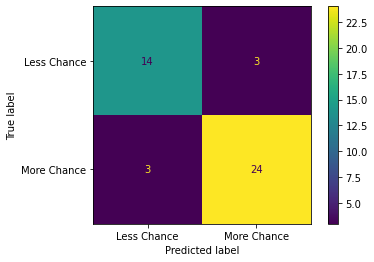

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Model 2 Results:")
print("----------------------------------\n")
print("AUC-ROC Score: {0:0.4f}%".format(roc_auc_score(y_test, y_pred) * 100))
print("Accuracy Score: {0:0.4f}%".format(accuracy_score(y_test,y_pred) * 100))
print("Precision Score: {0:0.4f}%".format(precision_score(y_test,y_pred) * 100))
print("Recall Score: {0:0.4f}%".format(recall_score(y_test,y_pred) * 100))
print("F1 Score: {0:0.4f}%".format(f1_score(y_test,y_pred) * 100))

fpr, tpr, temp = roc_curve(y_test, y_pred)

print("\n----------------------------------\n")
print("ROC Curve:")
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("\n----------------------------------\n")
print("Confusion matrix:")
cm = confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm,display_labels =["Less Chance","More Chance"]).plot()
plt.show()